# Linear Regression Model (Part 1)

## Business Understanding

Our aim in the first part of the document is to construct a linear regression model for predicting continuous target variable "Y house price of unit area" in Real Estate Valuation dataset.
</br>
</br>
The data is collected from New Taipei City, Taiwan.
</br>
https://archive.ics.uci.edu/dataset/477/real+estate+valuation+data+set

## Data Understanding

In [164]:
import reg
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets



The dataset includes the following six features: transaction date, house age, distance to the nearest MRT station (Mass Rapid Transit), number of convenience stores nearby, latitude, and longitude. Each feature contains 414 entries.

In [165]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 6 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   X1 transaction date                     414 non-null    float64
 1   X2 house age                            414 non-null    float64
 2   X3 distance to the nearest MRT station  414 non-null    float64
 3   X4 number of convenience stores         414 non-null    int64  
 4   X5 latitude                             414 non-null    float64
 5   X6 longitude                            414 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 19.5 KB


The target variable is the house price per unit area. (10,000 New Taiwan Dollars/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

In [166]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 1 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Y house price of unit area  414 non-null    float64
dtypes: float64(1)
memory usage: 3.4 KB


For linear regression modeling to work, dependencies between feature- and target variables should be mostly linear. Let's examine some of them by plotting them:

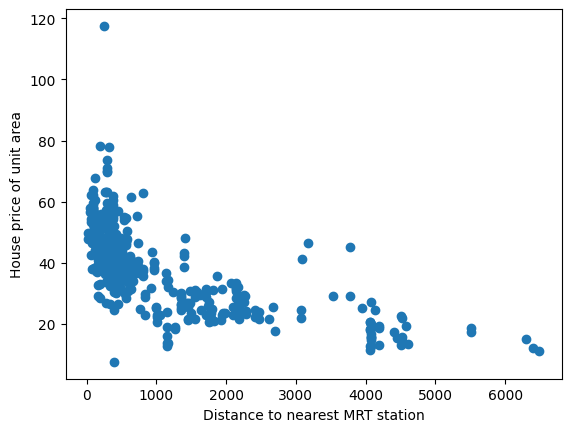

In [167]:
from matplotlib import pyplot as plt

plt.scatter(X["X3 distance to the nearest MRT station"], y)
plt.xlabel("Distance to nearest MRT station")
plt.ylabel("House price of unit area")
plt.show()

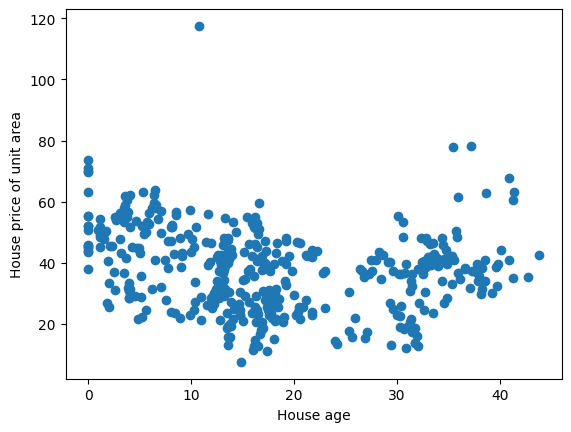

In [168]:
plt.scatter(X["X2 house age"], y)
plt.xlabel("House age")
plt.ylabel("House price of unit area")
plt.show()

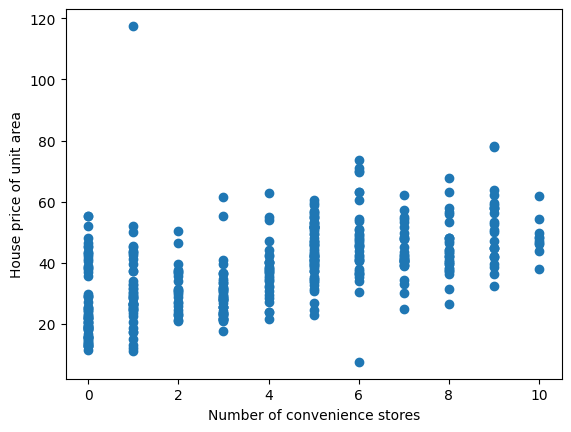

In [169]:
plt.scatter(X["X4 number of convenience stores"], y)
plt.xlabel("Number of convenience stores")
plt.ylabel("House price of unit area")
plt.show()

We determine that the data features and targets are linearly correlated: for all three cases plotted, the datapoints seem to form a mostly linear overall pattern across feature value ranges. This problem can be modeled using linear regression. 

## Data Preparation

Looking at the feature data, we can see that the values vary widely across different features. To ensure that each feature contributes equally to the model, it is necessary to standardize the features before training the linear regression model.

In [170]:
X.head()

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2012.917,19.5,306.59470,9,24.98034,121.53951
2,2013.583,13.3,561.98450,5,24.98746,121.54391
3,2013.500,13.3,561.98450,5,24.98746,121.54391
4,2012.833,5.0,390.56840,5,24.97937,121.54245


Before applying standardization, we split the data for training and testing.

In [171]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)

In [172]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


## Modeling

We use _LinearRegression_ class from sklearn library to train the model with the training data.

In [173]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

## Evaluation

In [174]:
b0 = model.intercept_
b0

array([38.09637462])

In [175]:
b1 = model.coef_[0]
b1

array([ 1.44826117, -3.16799159, -5.8850569 ,  3.11301749,  2.6301426 ,
       -0.4350521 ])

Next we have the feature coefficient values ordered from most impactful one to the least.

From the coefficient analysis, we can see that the distance to the nearest MRT station has the largest impact on house price among all features. Negative value indicates that the feature negatively impacts on the house price, in this case meaning that houses farther from MRT stations tend to be cheaper.

Second most impactful feature is house age. It also has negative impact on the house price, in this case meaning that the older the house is the cheaper it is.

Third most impactful feature, which is almost as impactful as the second, is number of convenience stores in the living circle. The circles radius is not mentioned in the dataset, however it is mentioned that stores are in near walking distance. Anyway, this has positive impact on the house price, meaning more stores nearby equals higher house cost.

Least impactful features are latitude, transaction date and longitude.


In [176]:
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": b1
})

coef_df["Abs_Coefficient"] = coef_df["Coefficient"].abs()
coef_df_sorted = coef_df.sort_values(by="Abs_Coefficient", ascending=False) # add temporary absolute value column for sorting correctly
coef_df_sorted = coef_df_sorted.drop(columns="Abs_Coefficient")
coef_df_sorted

,Feature,Coefficient
2,X3 distance to the nearest MRT station,-5.885057
1,X2 house age,-3.167992
3,X4 number of convenience stores,3.113017
4,X5 latitude,2.630143
0,X1 transaction date,1.448261
5,X6 longitude,-0.435052


## Validation

Next we use the regression model to predict house prices with the test data.

In [177]:
from sklearn.metrics import mean_absolute_error

preds = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, preds)
print("MAE:", mae)

MAE: 4.959311322441782


Models mean absolute error value is around 4.96, meaning that on average, the models predictions are off by 4.96 × 10,000 NTD/Ping.

In other metrics (Euro/m2) it would be 4.96 * (270 / 3.3) $ \approx $ 405 Euros off by average per square meter.
</br>
Where 1 NTD = 0,027 Euro (5.2.2026) and 1 Ping = 3.3 m2.



In the dataset, average price per Ping is around 37,9 * 10 000 NTD.

So in that context, the error percentage is around 13 % for the model.

In [178]:
avg_price_ping = (y.mean().values[0]) # values[0] so it doesn't return the column name also.
print("Average price per Ping:", avg_price_ping)

Average price per Ping: 37.980193236714975


In [179]:
MAE = 4.96

error_percentage = MAE / avg_price_ping * 100
error_percentage

np.float64(13.059438558109363)

# Logistic Regression Model (Part 2)

## Business Understanding

In part 2, we aim to create a model based on logistic regression that has the capability to predict whether a given apartment is above or below the average price per Ping.

As calculated previously, mean apartment price per Ping is around 37,9 * 10 000 NTD. This will act as our cutoff point for the model, whether a price is over or under the mean price.

We start over:

In [180]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
real_estate_valuation = fetch_ucirepo(id=477)

# data (as pandas dataframes)
X = real_estate_valuation.data.features
y = real_estate_valuation.data.targets

## Data Preparation

Our first step is to re-encode target values as being under or over mean apartment price per Ping:

In [181]:
y_binary_encoded = pd.DataFrame() # new empty frame

y_binary_encoded["house price over mean"] = y["Y house price of unit area"].map(lambda x: 1 if x >= 37.9 else 0)

y_binary_encoded["house price over mean"]

0      1
1      1
2      1
3      1
4      1
      ..
409    0
410    1
411    1
412    1
413    1
Name: house price over mean, Length: 414, dtype: int64

Next, we again split the data into training and test sets before standardizing both feature sets (X_train and X_test) separately.

We use the new y-target dataframe that's been re-encoded to 1 and 0.

In [182]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary_encoded, test_size=0.2, random_state=123
)

In [183]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


## Modeling

In [184]:
from sklearn.linear_model import LogisticRegression

# build and fit model
reg = LogisticRegression(solver='lbfgs')
reg.fit(X_train_scaled,y_train.values.ravel())

print("Coefficients: ",reg.coef_)
print("Intercept: ", reg.intercept_)

Coefficients:  [[ 0.31349549 -0.68898701 -2.31007379  0.62655473  0.95884062  0.0836134 ]]
Intercept:  [-0.58295122]


The coefficients show us how each input feature affects the prediction of whether an apartment price is above the mean. Positive numbers increase the probability, negative numbers decrease it.

Our model following coefficients:
0.31349549, -0.68898701, -2.31007379, 0.62655473, 0.95884062, 0.0836134

Each number matches one input feature (in the order they appear in X_train_scaled). 
For example, the first coefficient (0.313) slightly increases the predicted probability that an apartment is above the mean when the first feature increases, while the third coefficient (-2.310) strongly decreases the probability when the third feature increases.

The intercept (-0.583) is the starting point for the prediction when all features are zero. The coefficients adjust this starting value to get the final probability.

## Evaluation

We evaluate the model using 10-fold cross-validation to see how well it predicts whether an apartment price is above or below the mean.

Accuracy: 0.83
Confusion Matrix:
 [[154  44]
 [ 25 191]]


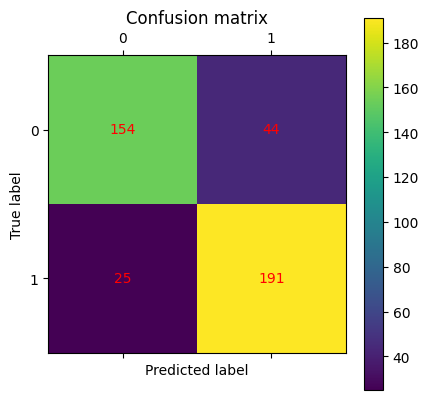

In [185]:
from sklearn.metrics import confusion_matrix
# cross-validation
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score

y_pred = cross_val_predict(estimator=reg, X=X, y=y_binary_encoded.values.ravel(), cv=10)

cm = confusion_matrix(y_binary_encoded.values.ravel(), y_pred)
accuracy = accuracy_score(y_binary_encoded.values.ravel(), y_pred)

print("Accuracy: %0.2f" % accuracy)
print("Confusion Matrix:\n", cm)

# visualize confusion matrix
plt.matshow(cm)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
# include counts
for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Validation

We validate the logistic regression model by interpreting its performance on the cross-validated predictions. We use 10-fold cross-validation and the model achieved an accuracy of 0.83, which means that the model correctly predicts whether an apartment price is above or below the mean in 83% of cases.

The confusion matrix shows the model’s predictions:

True Positives (191): apartments correctly predicted to be above the mean price.

True Negatives (154): apartments correctly predicted to be below the mean price.

False Positives (44): apartments predicted above mean price but actually below

False Negatives (25): apartments predicted below mean price but actually above.

The model performs quite well, which can be seen from its high accuracy and few incorrect predictions.